<a href="https://colab.research.google.com/github/khoi75919/deep-learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Deep-Learning'
! ls

/content/drive/My Drive/Deep-Learning


In [ ]:
!pip install scipy

In [ ]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
!pip install -q tensorflow==2.3.1

     |████████████████████████████████| 320.4MB 53kB/s 


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
if 'fashion_mnist' in tfds.list_builders():
  print("Yes")

Yes


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteV19P6V/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteV19P6V/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
paddings = tf.constant([[2, 2], [2, 2], [0, 0]])
def normalize(images, labels):
  images = tf.pad(images, paddings)
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((32,32))
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

ValueError: ignored

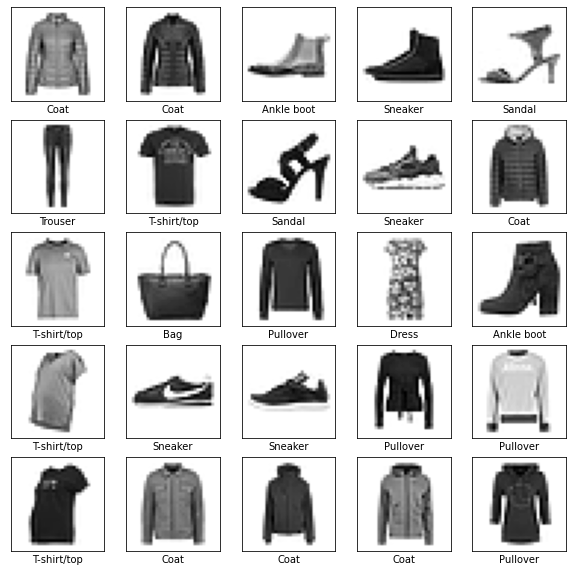

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((32,32))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (5,5), padding='same', activation=tf.nn.relu,
                           input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(16, (5,5), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation=tf.nn.relu),
    tf.keras.layers.Dense(84, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.4581 - accuracy: 0.8337
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3041 - accuracy: 0.8874
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2612 - accuracy: 0.9039
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2326 - accuracy: 0.9136
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2095 - accuracy: 0.9221
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1890 - accuracy: 0.9294
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1720 - accuracy: 0.9356
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1644 - accuracy: 0.9384
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1462 - accuracy: 0.9439
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.2840 - accuracy: 0.9118
Accuracy on test dataset: 0.9118000268936157


In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)


In [ ]:
predictions[0]

array([1.8239934e-03, 6.9338084e-06, 8.1639908e-02, 2.8640243e-05,
       7.9298472e-01, 1.7928971e-06, 1.2349262e-01, 1.4915527e-06,
       1.0671257e-05, 9.3002900e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

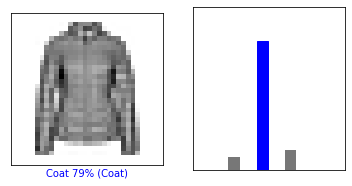

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

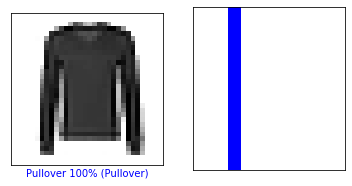

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)


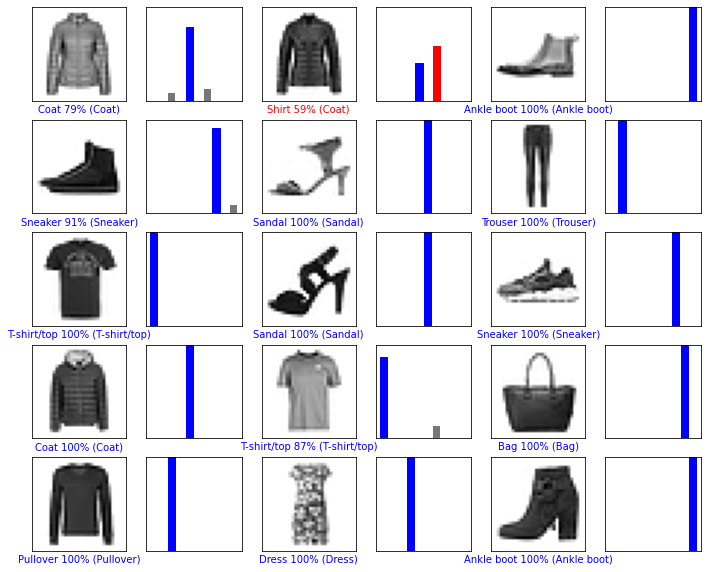

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
img = test_images[0]

print(img.shape)

(32, 32, 1)


In [ ]:
img = np.array([img])

print(img.shape)

(1, 32, 32, 1)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.8239901e-03 6.9337957e-06 8.1639849e-02 2.8640219e-05 7.9298478e-01
  1.7928957e-06 1.2349255e-01 1.4915514e-06 1.0671249e-05 9.3002909e-06]]


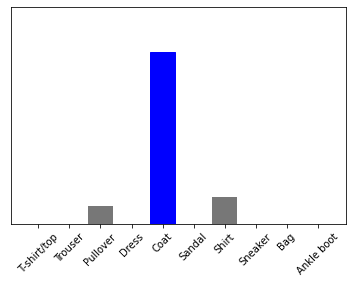

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
model.compile(tf.keras.optimizers.SGD(), loss='mse')
history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
                    epochs=10, batch_size=1, callbacks=[callback],
                    verbose=0)
len(history.history['loss'])